# MACHINE LEARNING - LOGISTIC REGRESSION 


## CLASSIFICATION 

It is a type of supervised machine learning method where the model tries to predict the correct label of a input data. Where the goal is to predict categorical labels (binary or multi-calsses) for given input data. The goal is to learn a function [f(x) --> y] that maps inputs x to correct classes y.

input : Features (numerical or categorical)

Output : Class label --> y (0,1) for binary or y(1,2,..,k) for multi-class


CLASSES - sorts data points into predefined groups 

**Types of classification**

- BINARY CLASSIFICATION

Only 2 classes  

Examples :

Email : spam/not spam , 0 or 1

- MULTI-CLASS CLASSIFICATION

more than 2 classes

Examples: 

- iris flower dataset: setosa, versicolor, virginca
- identifying a fruits from a set of images 

## LOGISTIC REGRESSION

It is used for binary classification problems, where the target variable is categorical with 2 classes. It models the probability of the target variable given the input features and predicts the class with highest probability.

It is a type of linear model in sklearn,3 types of logistic regression is 

**Binomial logistic regression** - when dependent variable hase only 2 possible categorical (yes/no,spam/not spam). 

**multinomial logistic regression**- it has three or more possible categories that are not ordered. 

**ordinal logistic regression**- It has three or more categorical with a natural order or ranking

used sigmoid S-curve and solved classification problems 

**SIGMOID FUNCTION**

it is used to convert the raw output of the model into a probability value between 0 and 1 and it form S shaped curve called sigmoid curve 



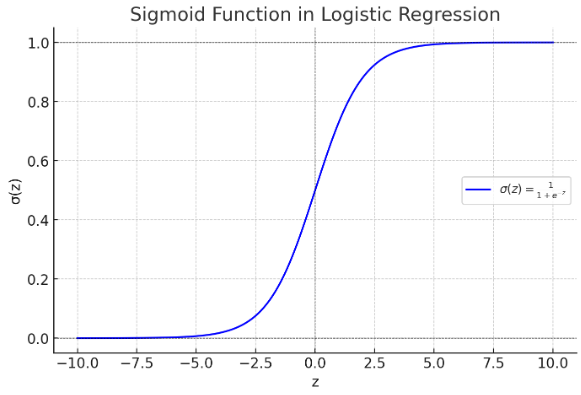

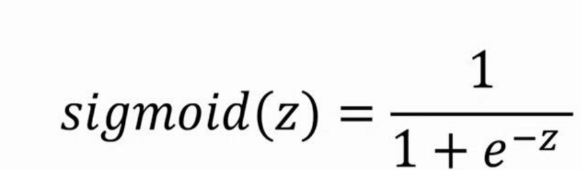


Where:

**z=b0+b1x1+b2x2+b3x3+........+bnxn**

b0 = intercept(bias)
b1,b2,b3---bn = coefficients
x1,x2---xn = input features


The output is a probability:

close to 0 --> class 0(No)

close to 1 --> class 1(Yes)

**Decision Boundary**

(It is a line or surface that sepreates different classes by setting a threshold(typically 0.5) for the predicted probability)
We set a threshold :

- If probability >= 0.5 --> predict class 1
- If probability < 0.5 -->predict class 0

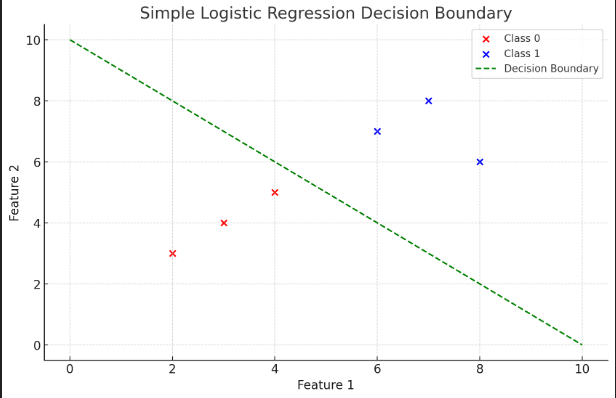

Where:

- 𝑧 can be any real number (from −∞ to +∞).
- 𝑒 is Euler’s number (~2.718).

Output Range:

σ(z) is always between 0 and 1.

- As 𝑧 → +∞, 𝜎(𝑧) → 1
- As 𝑧 → −∞, 𝜎(𝑧) → 0

That’s why it’s often used for probability predictions.

Shape:

- It looke like an S-shaped curve
- The midpoint is at z = 0, where 𝜎(0) = 0.5
- Values below 0 get squashed closer to 0
- Values above 0 get squashed closer to 1

In [129]:
import os
os.listdir('/kaggle/input/')

['loan-dataset']

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
import pandas as pd
df = pd.read_csv("/kaggle/input/loan-dataset/classification_dataset.csv")

In [132]:
df.head(10)

,Age,Income,Education,Experience,City,Loan_Approval
0,56,60794,High School,0,Delhi,No
1,46,99459,PhD,15,Bangalore,Yes
2,32,137932,Bachelors,27,Bangalore,Yes
3,25,70192,Bachelors,20,Hyderabad,Yes
4,38,47703,PhD,29,Hyderabad,No
5,56,104193,Masters,2,Mumbai,No
6,36,89165,Bachelors,33,Delhi,Yes
7,40,87650,PhD,5,Hyderabad,Yes
8,28,76516,Bachelors,28,Bangalore,Yes
9,28,119981,PhD,2,Bangalore,No


In [133]:
df.isnull().sum()

Age              0
Income           0
Education        0
Experience       0
City             0
Loan_Approval    0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            10000 non-null  int64 
 1   Income         10000 non-null  int64 
 2   Education      10000 non-null  object
 3   Experience     10000 non-null  int64 
 4   City           10000 non-null  object
 5   Loan_Approval  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [135]:
df.describe()

,Age,Income,Experience
count,10000.000000,10000.000000,10000.000000
mean,38.546400,84547.581500,19.640700
std,12.014287,37835.550107,11.499575
min,18.000000,20005.000000,0.000000
25%,28.000000,50863.750000,10.000000
50%,39.000000,84513.000000,20.000000
75%,49.000000,117201.750000,30.000000
max,59.000000,149980.000000,39.000000


In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Education"]=le.fit_transform(df["Education"])
df["City"]=le.fit_transform(df["City"])
df["Loan_Approval"]=le.fit_transform(df["Loan_Approval"])

In [137]:
x=df.drop("Loan_Approval",axis=1)
y=df["Loan_Approval"]

In [138]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
display("x_train:\n",x_train)
print("y_train:\n",y_train)
display("x_test:\n",x_test)
display("y_test:\n",y_test)

'x_train:\n'

,Age,Income,Education,Experience,City
9254,32,134322,0,31,0
1561,43,68135,1,25,1
1670,58,86577,0,38,2
6087,42,108941,1,8,0
6669,35,47912,2,5,0
...,...,...,...,...,...
5734,37,140718,0,28,0
5191,39,60403,0,20,1
5390,22,51821,0,39,2
860,23,140759,2,34,3


y_train:
 9254    1
1561    1
1670    1
6087    1
6669    0
       ..
5734    1
5191    1
5390    1
860     1
7270    0
Name: Loan_Approval, Length: 8000, dtype: int64


'x_test:\n'

,Age,Income,Education,Experience,City
6252,24,42940,1,0,4
4684,42,126128,1,29,0
1731,49,103038,2,6,4
4742,33,147962,0,28,2
4521,29,140403,0,27,0
...,...,...,...,...,...
6412,52,42455,1,31,1
8285,24,28261,2,37,4
7853,49,29879,1,21,0
1095,47,107122,1,31,3


'y_test:\n'

6252    0
4684    1
1731    1
4742    1
4521    1
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Loan_Approval, Length: 2000, dtype: int64

In [139]:
from sklearn import linear_model

model=linear_model.LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [140]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 ... 0 1 0]
6252    0
4684    1
1731    1
4742    1
4521    1
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Loan_Approval, Length: 2000, dtype: int64


## CLASSIFICATION PROBLEMS 

**ACCURACY**

It measures the fraction of correct predictions

Accuracy = number of correct predictions/ total predictions 

- Good for balnced datasets
- Can be misleading if classes are imbalanced

**CONFUSION MATRIX**

The counts of **true vs predicted labels** in a 2x2 table for binary classification

- **Precision**

  measures how many predicted **Yes** are actually Yes:

  precision = TP/(TP+FP)

- **Recall**

Measures how many actual **Yes** were correctly predicted:

Recall = TP/(TP+FN)

- **F1-Score**

Harmonic mean of precision and recall, it is usefull when classes are imbalanced:

F1-Score = 2. precision . recall / precision + recall

- **Support**

Number of actual occurrences of each class in the dataset

**Classification report**

It is a sumary of key metrics used to evaluate the performance of a classification model

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("Accuracy:",ac)
print("Confusion matrix:\n",cm)
print("classification report:\n",report)

Accuracy: 0.794
Confusion matrix:
 [[ 336  367]
 [  45 1252]]
classification report:
               precision    recall  f1-score   support

           0       0.88      0.48      0.62       703
           1       0.77      0.97      0.86      1297

    accuracy                           0.79      2000
   macro avg       0.83      0.72      0.74      2000
weighted avg       0.81      0.79      0.77      2000



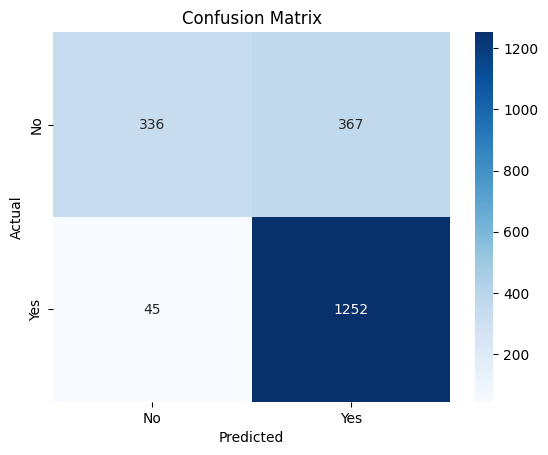

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

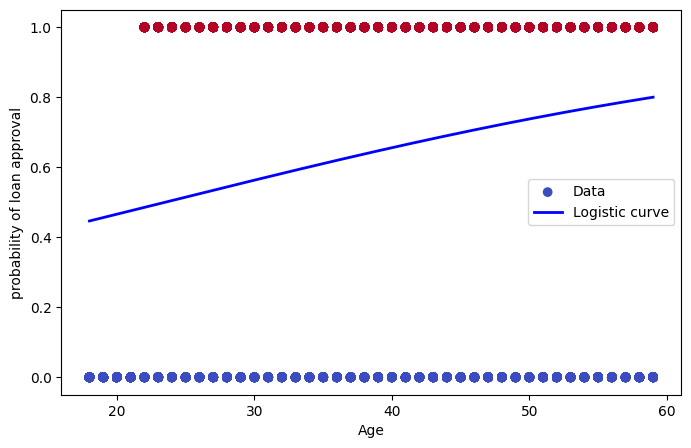

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X=df[["Age"]]
Y=df["Loan_Approval"]

model.fit(X,Y)

X_range=np.linspace(X.min(),X.max(),300).reshape(-1,1)
y_prod=model.predict_proba(X_range)[:,1]

plt.figure(figsize=(8,5))
plt.scatter(X,Y,c=Y,cmap="coolwarm",label="Data")
plt.plot(X_range,y_prob,color="blue",linewidth=2,label="Logistic curve")
plt.xlabel("Age")
plt.ylabel("probability of loan approval")
plt.legend()
plt.show()